archive.csv



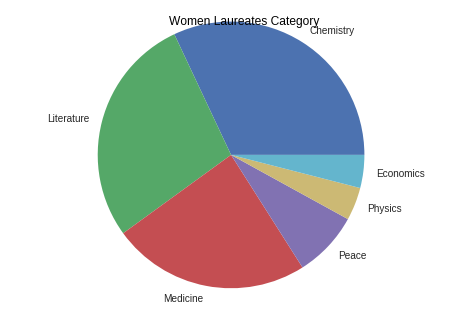

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

data = pd.read_csv('../input/archive.csv')
women = data[(data.Sex == 'Female')]
by_category = women['Category'].value_counts()
percent = by_category/50
categories = data['Category'].unique() 

#title
plt.text(0.1, 1, 'Women Laureates Category',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=12, color='k')

# Plot
plt.pie(percent.values, labels = categories)
plt.axis('equal')
plt.show()
plt.clf()

In [2]:
countries = data['Birth Country'].unique()

dict = {}

for category in categories:
    for country in countries:
        x = data.Category[(data['Category'] == category) & (data['Birth Country'] == country)].count()
        #print(category, country, x)
        dict.setdefault(category, []).append(x)
        
for country in countries:
    dict.setdefault('country', []).append(country)

df = pd.DataFrame(dict)

for lab, row in df.iterrows() :
    df.loc[lab, 'total'] = row['Economics'] + row['Chemistry'] + row['Literature'] + row['Medicine'] + row['Peace'] + row['Physics']
   
df = df.sort_values('total')
        

In [3]:
N = len(countries)
print(N)
ind = range(N)  
width = 0.8
plt.figure(figsize=(100,150))

p1 = plt.barh(ind, df['Chemistry'], width, color = '#137e6d')
p2 = plt.barh(ind, df['Literature'], width, df['Chemistry'],  color = '#95d0fc')
p3 = plt.barh(ind, df['Medicine'], width, df['Chemistry'] + df['Literature'], color = '#03719c')
p4 = plt.barh(ind, df['Peace'], width, df['Chemistry'] + df['Literature'] + df['Medicine'], color = '#6a79f7')
p5 = plt.barh(ind, df['Physics'], width, df['Chemistry'] + df['Literature'] + df['Medicine'] + df['Peace'], color = '#137e6d')
p6 = plt.barh(ind, df['Economics'], width, df['Chemistry'] + df['Literature'] + df['Medicine'] + df['Peace'] + df['Physics'], color = '#95d0fc')

plt.xticks(np.arange(0, 280, 1))
plt.yticks(ind,df['country'],  fontsize=56)

plt.show()
plt.clf()

122
